In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\Redmi\anaconda3\envs\da_practicum_env\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Анализ данных об авариях в США за 2022 год.

Целью данного проекта является анализ данных об авариях, произошедших в США в 2022 году, с целью выявления инсайтов и закономерностей, которые могут помочь в принятии мер по снижению количества аварий, включая улучшение дорожной инфраструктуры, введение ограничений в определенных условиях, улучшение погодных прогнозов и других мер безопасности. Путем проведения исследовательского анализа мы стремимся выяснить, как погодные условия, время суток, серьезность ущерба, а также географические факторы влияют на количество происшедших аварий.

Предполагаем, что исследование позволит выявить основные факторы, которые влияют на количество аварий и оценить обстановку с авариями в целом.
<pre>
План работы:
Шаг 1. Загрузка данных 
Шаг 2. Предобработка данных  
    2.1 Проверить пропуски и дубликаты  
    2.2 Привести названия столбцов к змеиному типу  
    2.3 Выделить столбик с месяцем аварии  
Шаг 3. Исследовательский анализ  
    3.1 Анализ степени серьезности аварий (severity):  
        3.1.1 Определить наиболее часто встречающуюся степень серьезности аварий.  
        3.1.2 Проанализировать зависимость между степенью серьезности и погодными условиями  
        3.1.3 Проанализировать зависимость между степенью серьезности и временем суток  
    3.2 Определить, какие погодные условия чаще всего сопровождают аварии.  
        3.2.2 Исследовать связь между погодными условиями и количеством аварий  
        3.3.3 Исследовать связь между температурой воздуха и количеством аварий  
    3.3 Географические особенности:  
        3.2.1 Изучить распределение аварий по городам, штатам и странам.  
        3.3.2 Определить наиболее аварийные местности и выявить причины их повышенной аварийности.  
        3.3.3 Влияние времени суток на аварии:  
    3.4 Проанализировать количество аварий в зависимости от времени суток (день/ночь).  
        3.4.1 Определить, возможно ли сезонное влияние на частоту происшедших аварий.  
        3.4.2 Влияние дополнительных факторов на аварии:  
    3.5 Оценить, как наличие различных объектов и удобств в близлежащих местах (например, перекрестков, светофоров, станций) влияет на количество аварий.  
    3.6 Проанализировать, как световые условия влияют на количесвто аварий:  
        3.6.1 Проанализировать различия в количестве аварий в зависимости от периода дня (день/ночь) и световых условий (гражданские, морские, астрономические сумерки).
</div>

## Предобработка данных.

In [2]:
# укажем путь к датасету
csv_file_path = "D:\\проекты порт\\US_Accidents_March23.csv"
population="D:\\проекты порт\\population of USA cities.xlsx"

In [3]:
#загрузим датасет с населением в городах
population=pd.read_excel(population)
#посмотрим на него
print(population.head())

     Name, city Population
0      New York  8 244 936
1   Los Angeles  3 884 319
2       Chicago  2 695 615
3       Houston  2 195 984
4  Philadelphia  1 526 026


В датасете population необходимо привести названия столбцов к единому типу и поменять тип данных в столбце Population. Пропусков нет

In [4]:
#
# Чтение данных порциями с использованием параметра chunksize
chunk_size = 100000  # Указать подходящий размер порции
chunks = pd.read_csv(csv_file_path, chunksize=chunk_size)

# подсчет общего числа строк в файле
total_rows = 0

# Обработка данных в цикле
for chunk in chunks:
    total_rows += len(chunk)

# Вывод общего числа строк в файле
print("Общее число строк в файле:", total_rows)


Общее число строк в файле: 7728394


In [5]:
# Посмотрим общую информацию о данных в каждой порции
for chunk in chunks:
    print(chunk.info())

In [6]:
# Чтение данных порциями с использованием параметра chunksize
chunk_size = 100000
chunks = pd.read_csv(csv_file_path, chunksize=chunk_size)

# Выберем первую порцию данных и выведем ее содержимое
first_chunk = next(chunks)
print(first_chunk.head())

    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          F

In [7]:
# Создаём пустой список, чтобы хранить отфильтрованные части данных
filtered_chunks = []

# Проходёмся по каждой части данных, применим операции с датами и фильтрацию
for chunk in chunks:
    # Преобразуем столбец 'Start_Time' в тип datetime
    chunk['Start_Time'] = pd.to_datetime(chunk['Start_Time'])
    # Создаём условие фильтрации для получения строк за 2022 год
    condition = (chunk['Start_Time'].dt.year == 2022)
    # Применим условие фильтрации к текущей части данных
    filtered_chunk = chunk[condition]
    # Если есть хотя бы одна строка удовлетворяющая условию, добавим отфильтрованную часть данных в список
    if not filtered_chunk.empty:
        filtered_chunks.append(filtered_chunk)

# Проверим, что хотя бы одна часть данных удовлетворяет условию фильтрации
if len(filtered_chunks) > 0:
    # Объединим отфильтрованные части данных в один DataFrame
    df_2022 = pd.concat(filtered_chunks)
else:
    print("Нет данных за 2022 год.")


In [8]:
# Создаём новый DataFrame, копируя данные из отфильтрованного DataFrame
road_accidents = df_2022.copy()

In [9]:
#посмотрим информацию о датафреймах
display(road_accidents.info())
display(population.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1762452 entries, 512217 to 5423496
Data columns (total 46 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int64         
 3   Start_Time             datetime64[ns]
 4   End_Time               object        
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   End_Lat                float64       
 8   End_Lng                float64       
 9   Distance(mi)           float64       
 10  Description            object        
 11  Street                 object        
 12  City                   object        
 13  County                 object        
 14  State                  object        
 15  Zipcode                object        
 16  Country                object        
 17  Timezone               object        
 18  Airport_Code     

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name, city  100 non-null    object
 1   Population  100 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


None

<pre>
Расшифруем содержание столбцов в population:
name_city - название города
population - количество горожан

Расшифруем содержание столбцов в road_accidents:
id - идентификатор аварии
source - источник, сообщивший об аварии
severity - степень серьёзности (от 1 до 4)
start_time - время начала аварии
end_time - время конца аварии
start_lat - начальная широта
start_lng  - начальная долгота
end_lat  - конечная широта
end_lng  - конечная долгота
distance(mi) - Протяженность дороги, затронутой аварией, в милях
description - описание аварии
street - улица
city - город
county - 
state - штат
zipcode - индекс
country  - страна
timezone - часовой пояс
airport_code - код аэропорта
weather_timestamp - время наблюдения за погодой
temperature(F) -  температура воздуха (в Фаренгейтах).
wind_chill(F) - холод ветра (по Фаренгейту).
humidity(%) -  влажность (в процентах).
pressure(in) - давление воздуха (в дюймах).
visibility(mi) -  видимость (в милях).
wind_direction -  направление ветра.
wind_speed(mph) - скорость ветра (в милях в час).
precipitation(in) - количество осадков в дюймах, если они есть.
weather_condition - погодные условия (дождь, снег, гроза, туман и т.д.).
amenity - наличие удобств в близлежащем месте
bump - наличие лежачего полицейского
crossing - наличие перекрестка в близлежащем месте.
give_way - наличие знака Уступи дорогу
junction - наличие перекрестка в соседнем месте.
no_exit
railway - наличие поблизости железной дороги.
roundabout - наличие кольцевой развязки поблизости.
station - наличие станции поблизости
stop - наличие остановки поблизости.
traffic_calming
traffic_signal - сигнал светофора
turning_loop
sunrise_sunset - период дня (т.е. день или ночь) в зависимости от восхода/захода солнца.
civil_twilight - период дня (т.е. день или ночь) на основе гражданских сумерек.
nautical_twilight - период дня (т.е. день или ночь) на основе морских сумерек.
astronomical_twilight - период дня (т.е. день или ночь) на основе астрономических сумерек.

In [11]:
# приведём названия столбцов к единому типу
road_accidents.columns = [x.lower().replace(' ', '_') for x in road_accidents.columns]
population.columns = [x.lower().replace(', ', '_') for x in population.columns]

In [ ]:
road_accidents.isna().sum()

id                            0
source                        0
severity                      0
start_time                    0
end_time                      0
start_lat                     0
start_lng                     0
end_lat                  236182
end_lng                  236182
distance(mi)                  0
description                   0
street                     7236
city                         65
county                        0
state                         0
zipcode                     307
country                       0
timezone                   1713
airport_code               7199
weather_timestamp         29595
temperature(f)            38718
wind_chill(f)             54508
humidity(%)               41107
pressure(in)              33134
visibility(mi)            41953
wind_direction            48385
wind_speed(mph)           48377
precipitation(in)         64475
weather_condition         38688
amenity                       0
bump                          0
crossing

<pre>
В столбцах end_lat и end_lng 236182 пропусков, скорее всего, потому что во время аварии машины не перемещались, а остановились на месте.
7236 пропусков с названиями улиц, пока ничего с ними делать не будем
Есть пропуски в zipcode, timezone и airport_code - эти столбцы не нужны, их удалим
Достаточно много пропусков в столбцах с данными о погоде и сумерках, там значения NaN (это указано в документации датасета). 

In [ ]:
#удалим из датасета столбцы, которые нам точно не нужны
road_accidents = new_df.drop(['source', 'zipcode', 'no_exit', 'traffic_calming', 'turning_loop'], axis=1)

## Исследовательский анализ

### Анализ степени серьезности аварий

1762452


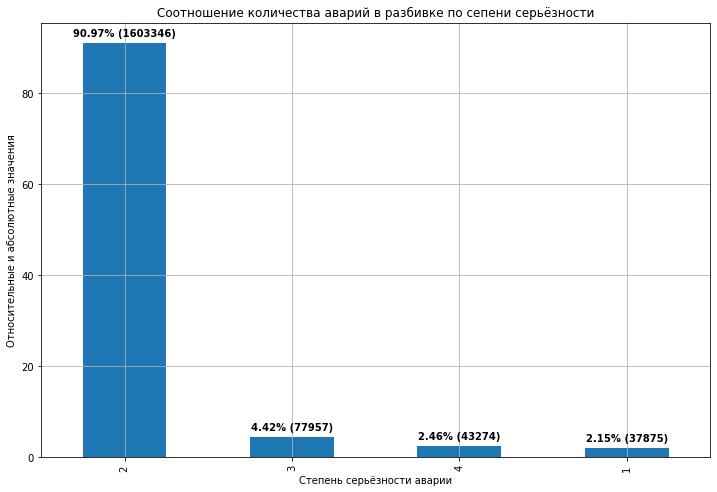

In [14]:
#посчитаем количество аварий за 2022 год
total = road_accidents['id'].count()
print(total)
# Определим наиболее часто встречающуюся степень серьезности аварий.
severity_count = road_accidents.groupby('severity')['id'].count().sort_values(ascending=False)
# Рассчитаем проценты от общего количества для каждого значения 'severity'
severity_percentages = (severity_count / total) * 100
ax = severity_percentages.plot(kind='bar', grid=True, figsize=(12,8))
ax.set_xlabel('Степень серьёзности аварии')
ax.set_ylabel('Относительные и абсолютные значения')
ax.set_title('Соотношение количества аварий в разбивке по сепени серьёзности')


# Добавим надписи с процентами и абсолютным количеством непосредственно на столбцах
for i, v in enumerate(severity_percentages):
    count = severity_count.iloc[i]
    ax.text(i, v + 1, f'{v:.2f}% ({count})', ha='center', va='bottom', fontweight='bold')

plt.show()

90% аварий - 2 степени серьёзности.  Указывает на умеренное влияние на движение, что может вызывать более длительные задержки и некоторые нарушения движения.

In [15]:
print(road_accidents['weather_condition'].unique())

['Fair' 'Mostly Cloudy' 'Partly Cloudy' 'Cloudy' nan 'Fog' 'Haze'
 'Light Rain' 'Thunder in the Vicinity' 'Rain' 'Heavy Rain'
 'Heavy Rain / Windy' 'Fair / Windy' 'Light Rain with Thunder' 'Smoke'
 'Thunder' 'Shallow Fog' 'Patches of Fog' 'Light Drizzle'
 'Showers in the Vicinity' 'T-Storm' 'Thunder / Windy'
 'Heavy T-Storm / Windy' 'Heavy T-Storm' 'Drizzle' 'Light Rain / Windy'
 'Mist' 'Mostly Cloudy / Windy' 'N/A Precipitation' 'Light Rain Shower'
 'Partly Cloudy / Windy' 'Cloudy / Windy' 'Drizzle and Fog'
 'T-Storm / Windy' 'Rain / Windy' 'Blowing Dust' 'Heavy Drizzle'
 'Smoke / Windy' 'Haze / Windy' 'Tornado' 'Light Snow' 'Snow'
 'Light Drizzle / Windy' 'Blowing Dust / Windy' 'Widespread Dust / Windy'
 'Wintry Mix' 'Light Snow / Windy' 'Wintry Mix / Windy'
 'Light Snow with Thunder' 'Fog / Windy' 'Snow and Thunder' 'Heavy Snow'
 'Light Snow Shower' 'Sleet' 'Light Snow and Sleet' 'Snow / Windy'
 'Rain Shower' 'Light Freezing Rain' 'Snow and Sleet' 'Light Sleet'
 'Light Freezing Driz

<pre>
Слишком много значений, выберем наиболее опасные погодные условия: 
Tornado(Торнадо),
Squalls (шквалы) и Windy (сильный ветер)
Hail (град) и Small Hail (маленький град), 
все виды гололёда - Freezing Rain, Light Freezing Rain, Heavy Freezing Rain, 
ледяной дождь - Freezing Drizzle, Light Freezing Drizzle, Heavy Freezing Drizzle, Freezing Rain'
Гроза 'Thunder', 'Thunder in the Vicinity') и сильная гроза ('Heavy T-Storm', 'Heavy T-Storm / Windy')
Сильный дождь 'Heavy Rain', 'Heavy Rain / Windy') и проливные дожди ('Showers in the Vicinity'
Снег и мокрый снег ('Snow', 'Snow / Windy', 'Light Snow', 'Light Snow / Windy', 'Light Snow Shower', 'Light Snow Shower / Windy', 'Light Snow with Thunder', 'Heavy Snow', 'Heavy Snow / Windy', 'Heavy Snow with Thunder', 'Sleet', 'Light Snow and Sleet', 'Snow and Sleet', 'Sleet and Thunder'
Туман 'Fog', 'Fog / Windy', 'Shallow Fog', 'Shallow Fog / Windy'
Мгла 'Haze', 'Haze / Windy'
Дым 'Smoke', 'Smoke / Windy'

In [17]:
#разобьём погодные условия на опасные и неопасные
# Список опасных погодных условий
dangerous_conditions = ['Tornado', 'Squalls', 'Windy', 'Hail', 'Small Hail', 'Freezing Rain', 'Light Freezing Rain',
                        'Heavy Freezing Rain', 'Freezing Drizzle', 'Light Freezing Drizzle', 'Heavy Freezing Drizzle',
                        'Thunder', 'Thunder in the Vicinity', 'Heavy T-Storm', 'Heavy T-Storm / Windy', 'Heavy Rain',
                        'Heavy Rain / Windy', 'Showers in the Vicinity', 'Snow', 'Snow / Windy', 'Light Snow',
                        'Light Snow / Windy', 'Light Snow Shower', 'Light Snow Shower / Windy', 'Light Snow with Thunder',
                        'Heavy Snow', 'Heavy Snow / Windy', 'Heavy Snow with Thunder', 'Sleet', 'Light Snow and Sleet',
                        'Snow and Sleet', 'Sleet and Thunder', 'Fog', 'Fog / Windy', 'Shallow Fog', 'Shallow Fog / Windy',
                        'Haze', 'Haze / Windy', 'Smoke', 'Smoke / Windy']

# Создание нового столбца 'dangerous weather conditions'
road_accidents['dangerous_weather_conditions'] = False  # Инициализируем все значения как False

# Проходим по столбцу weather_condition и устанавливаем True для опасных погодных условий
for index, condition in road_accidents['weather_condition'].iteritems():
    if condition in dangerous_conditions:
        road_accidents.at[index, 'dangerous_weather_conditions'] = True


C:\Users\Redmi\AppData\Local\Temp\ipykernel_17972\3654579560.py:16: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, condition in road_accidents['weather_condition'].iteritems():


<AxesSubplot:xlabel='severity'>

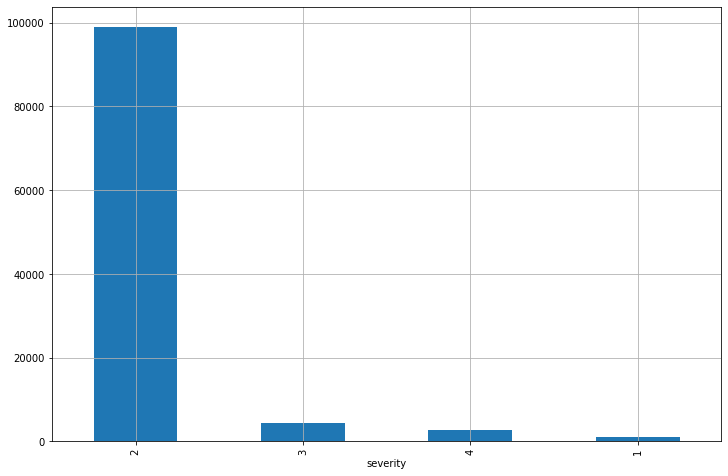

In [27]:
# изучим зависимоть между опасными погодными условиями и серьёзностью аварий
road_accidents.query('dangerous_weather_conditions ==True').groupby('severity')['id'].count().sort_values(ascending=False).plot(kind='bar',grid=True, figsize=(12,8))

Корреляция между плохой погодой и серьёзностью аварии слабая.

<AxesSubplot:xlabel='severity,sunrise_sunset'>

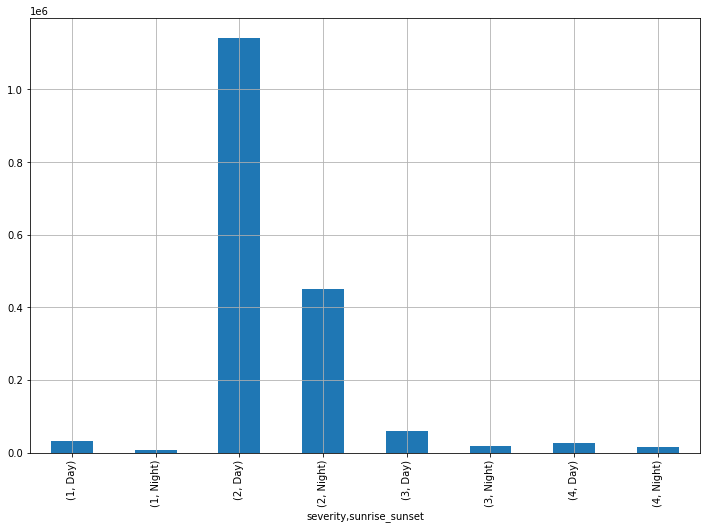

In [18]:
#Проанализировать зависимость между степенью серьезности и временем суток (день/ночь)
road_accidents.groupby('severity')['sunrise_sunset'].value_counts().plot(kind='bar', grid=True, figsize=(12,8))

### Какие погодные условия чаще всего сопровождают аварии

In [21]:
#посмотрим, сколько всего аварий было при опасных погодных условиях
print("Количество аварий при опасных погодных условиях:", road_accidents.query('dangerous_weather_conditions ==True')['id'].count())
#посмотрим % от общего числа аварий
print(round(road_accidents.query('dangerous_weather_conditions ==True')['id'].count()/road_accidents['id'].count()*100), "% аварий произошло при опасных погодных условиях")


Количество аварий при опасных погодных условиях: 107083
6 % аварий произошло при опасных погодных условиях


Можно предложить, что такой маленький процент аварий при опасных погодных условиях может говорить о том, что уже были предприняты определенные меры и инженерные решения для снижения аварийности в сложных погодных условиях. Однако, требуется более тчательный анализ для подтверждения или опровержения данной гипотезы

In [ ]:
#Исследовать связь между температурой воздуха и количеством аварий

### Географические особенности

In [23]:
# Убираем запятые и неразрывные пробелы из значений столбца 'population'
population['population'] = population['population'].str.replace(',', '').str.replace('\xa0', '').astype(int)
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name_city   100 non-null    object
 1   population  100 non-null    int32 
dtypes: int32(1), object(1)
memory usage: 1.3+ KB


<AxesSubplot:xlabel='state'>

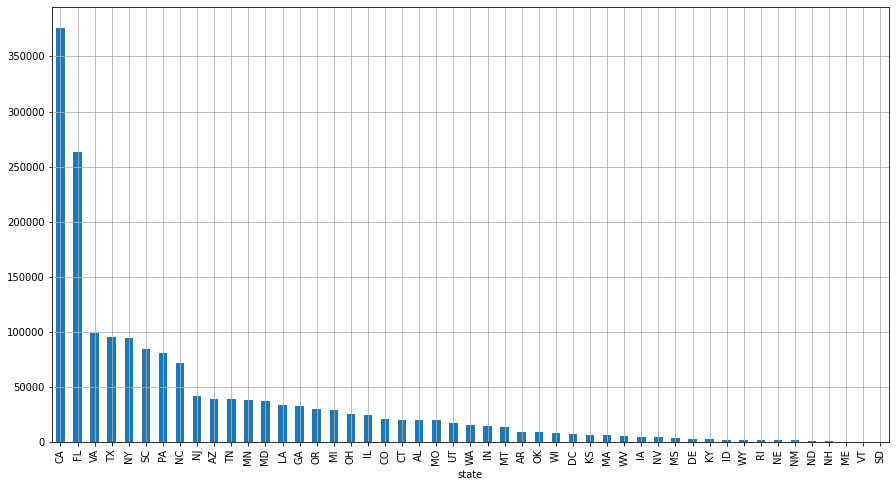

In [33]:
#количество аварий по штатам
road_accidents.groupby('state')['id'].count().sort_values(ascending=False).plot(kind='bar', grid=True, figsize=(15,8))

Больше всего аварий было в Калифорнии и Флориде.

Общая численность в каждом штате:
    
    соотнести кол-во жителей и количество аварий. (Какой процент в каждои штате?)

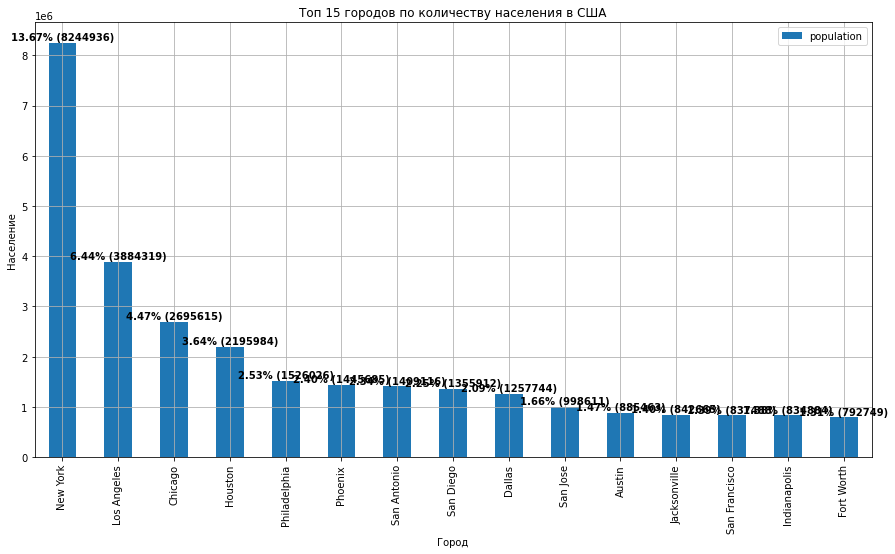

In [31]:
# Сумма населения всех городов
total_population = population['population'].sum()

# Сортируем данные по населению в порядке убывания и берем только топ-15 городов
top_15_cities = population.sort_values(by='population', ascending=False).head(15)

# Рассчитываем процент от общего населения для каждого города
top_15_cities['percentage'] = (top_15_cities['population'] / total_population) * 100

# Построение графика
ax = top_15_cities.plot(x='name_city', y='population', kind='bar', grid=True,figsize=(15, 8))
ax.set_xlabel('Город')
ax.set_ylabel('Население')
ax.set_title('Топ 15 городов по количеству населения в США')

# Добавление надписей с процентами и абсолютным количеством непосредственно на столбцах
for i, v in enumerate(top_15_cities['population']):
    percentage = top_15_cities.loc[top_15_cities.index[i], 'percentage']
    ax.text(i, v + 10000, f'{percentage:.2f}% ({v})', ha='center', va='bottom', fontweight='bold')

plt.show()


In [ ]:
#посмотрим количество аварий в самом густонаселённом городе США - Нью-Йорке
new_df.query('city == "New York"')['id'].count()

7849

Для населения около 8,5 млн 7849 аварий за год - это очень маленькое количество. 

<AxesSubplot:xlabel='city'>

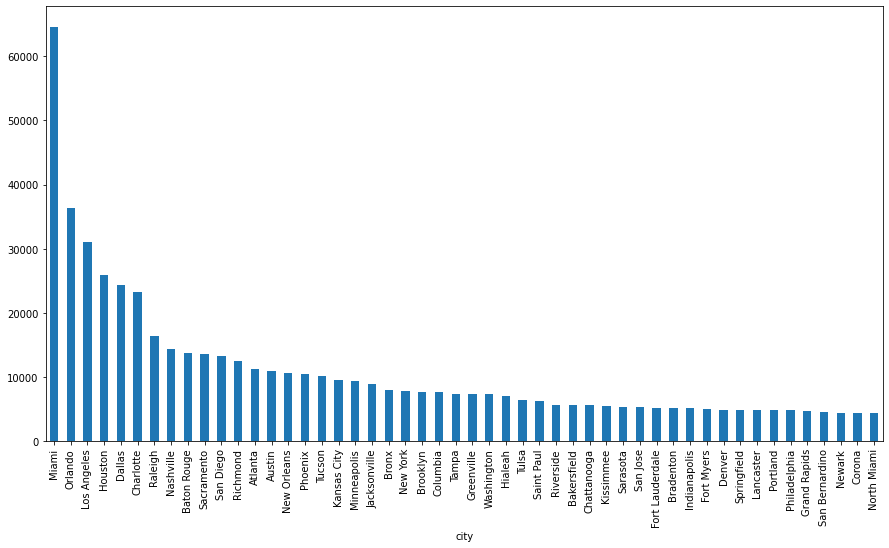

In [32]:
# посмотрим, в каких городах больше всего аварий
road_accidents.groupby('city')['id'].count().sort_values(ascending=False).head(50).plot(kind='bar', figsize = (15,8))

In [ ]:
new_df.groupby('city')['id'].count().sort_values(ascending=False).head(15)

city
Miami          64544
Orlando        36413
Los Angeles    31072
Houston        25865
Dallas         24306
Charlotte      23308
Raleigh        16410
Nashville      14368
Baton Rouge    13683
Sacramento     13543
San Diego      13324
Richmond       12514
Atlanta        11234
Austin         10906
New Orleans    10704
Name: id, dtype: int64

В городах Майами и Орландо было больше всего аварий (64544 и 36413) при плотности населения: Майами - 435 919 чел., Орландо -287 442 чел. При этом в городах миллионниках аварий было меньше, чем Майами и Орландо, например:

1. Лос-Анджелись - население 3 898 747
2. Хьюстон 2 320 268
3. Dallas 

In [ ]:
# Удалить столбцы 'Column1' и 'Column2' из DataFrame df, чтоб создать датафрейм с погодой
#weather = new_df.drop(['source', 'start_Time', 'end_time', 'Start_Lat', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Zipcode', 'Timezone', 'Airport_Code', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'], axis=1)

In [ ]:
print("Количество аварий ночью:", new_df.query('sunrise_sunset == "Night"')['id'].count())

Количество аварий ночью: 492367


In [ ]:
print("количество аварий днём", new_df.query('sunrise_sunset == "Day"')['id'].count())

количество аварий днём 1255189


Днём количество аварий больше в 2,5 раза, скорее всего это связано с интенсивностью движения. 

In [ ]:
weather

In [ ]:
weather.corr()

In [ ]:

# построить тепловую карту для всех числовых столбцов:
correlation_matrix = weather.corr()

# Используем библиотеку Seaborn для построения тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Тепловая карта корреляции")
plt.show()


NameError: name 'weather' is not defined

In [ ]:
twilight = new_df.drop(['Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition','Zipcode', 'Timezone', 'Airport_Code', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'], axis=1)

In [ ]:
twilight.corr()

In [ ]:
correlation_2 = twilight.corr()
# Используем библиотеку Seaborn для построения тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_2, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Тепловая карта корреляции")
plt.show()